In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [3]:
boom = pd.read_csv(r'E:\upgrad files\excel datasets\day.csv')
boom.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
boom.shape

(730, 16)

In [5]:
boom.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
boom.describe().columns

Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [7]:
boom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
boom.drop('instant',axis=1,inplace=True)

In [9]:
# season

boom['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [10]:
def ass_season(x):
    if x==1:
        return 'spring'
    elif x==2:
        return 'summer'
    elif x==3:
        return 'fall'
    else:
        return 'winter'

In [11]:
boom['season']=boom['season'].apply(ass_season)

In [12]:
boom['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [13]:
boom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 85.7+ KB


In [14]:
# mnth

boom['mnth'].value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [15]:
def ass_mnth(x):
    return x.map({
        1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
        7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'
    })

In [16]:
boom[['mnth']] = boom[['mnth']].apply(ass_mnth)

In [17]:
boom['mnth'].value_counts()

May    62
Jan    62
Dec    62
Mar    62
Jul    62
Oct    62
Aug    62
Apr    60
Nov    60
Jun    60
Sep    60
Feb    56
Name: mnth, dtype: int64

In [18]:
boom['weekday'].value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [19]:
def ass_weekday(x):
    return x.map({
        0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri',
        6:'Sat'
    })

In [20]:
boom[['weekday']] = boom[['weekday']].apply(ass_weekday)

In [21]:
boom['weekday'].value_counts()

Mon    105
Tue    105
Sun    104
Wed    104
Sat    104
Thu    104
Fri    104
Name: weekday, dtype: int64

In [22]:
boom['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [23]:
def ass_weathersit(x):
    return x.map({
        1:'Clear', 2:'Mist', 3:'Light Snow'
    })

In [24]:
boom[['weathersit']] = boom[['weathersit']].apply(ass_weathersit)

In [25]:
boom['weathersit'].value_counts()

Clear         463
Mist          246
Light Snow     21
Name: weathersit, dtype: int64

## Data Visualisation

In [26]:
boom.describe().columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

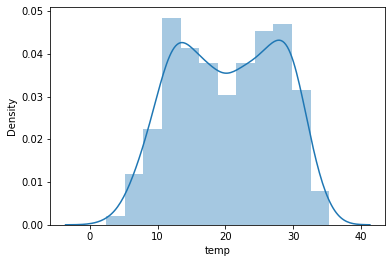

In [27]:
sns.distplot(boom['temp'])
plt.show();

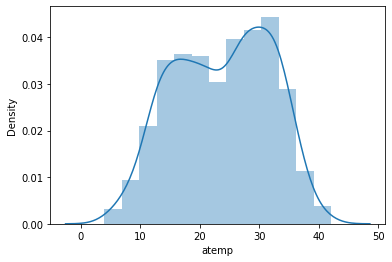

In [28]:
sns.distplot(boom['atemp'])
plt.show();

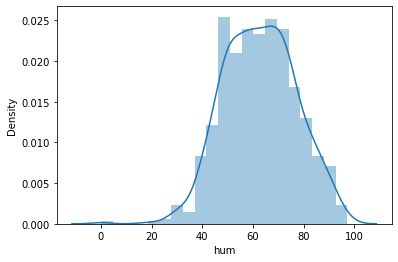

In [29]:
sns.distplot(boom['hum'])
plt.show();

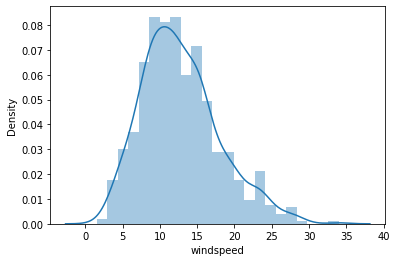

In [30]:
sns.distplot(boom['windspeed'])
plt.show();

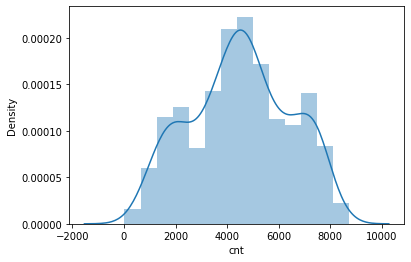

In [31]:
sns.distplot(boom['cnt'])
plt.show();

In [32]:
# date to datetime format

boom['dteday'] = boom['dteday'].astype('datetime64')

In [33]:
boom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    object        
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(6), object(4)
memory usage: 85.7+ 

In [34]:
boom['yr'] = boom['yr'].astype('object')

In [35]:
boom['holiday'] = boom['holiday'].astype('object')
boom['workingday'] = boom['workingday'].astype('object')

In [36]:
boom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    object        
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    object        
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    object        
 7   weathersit  730 non-null    object        
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(7)
memory usage: 85.7+ 

In [37]:
# Categorical variables

boom_categorical = boom.select_dtypes(exclude=['float64','int64','datetime64'])
boom_categorical.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

In [38]:
len(boom_categorical.columns)

7

## Visualising Categorical variable

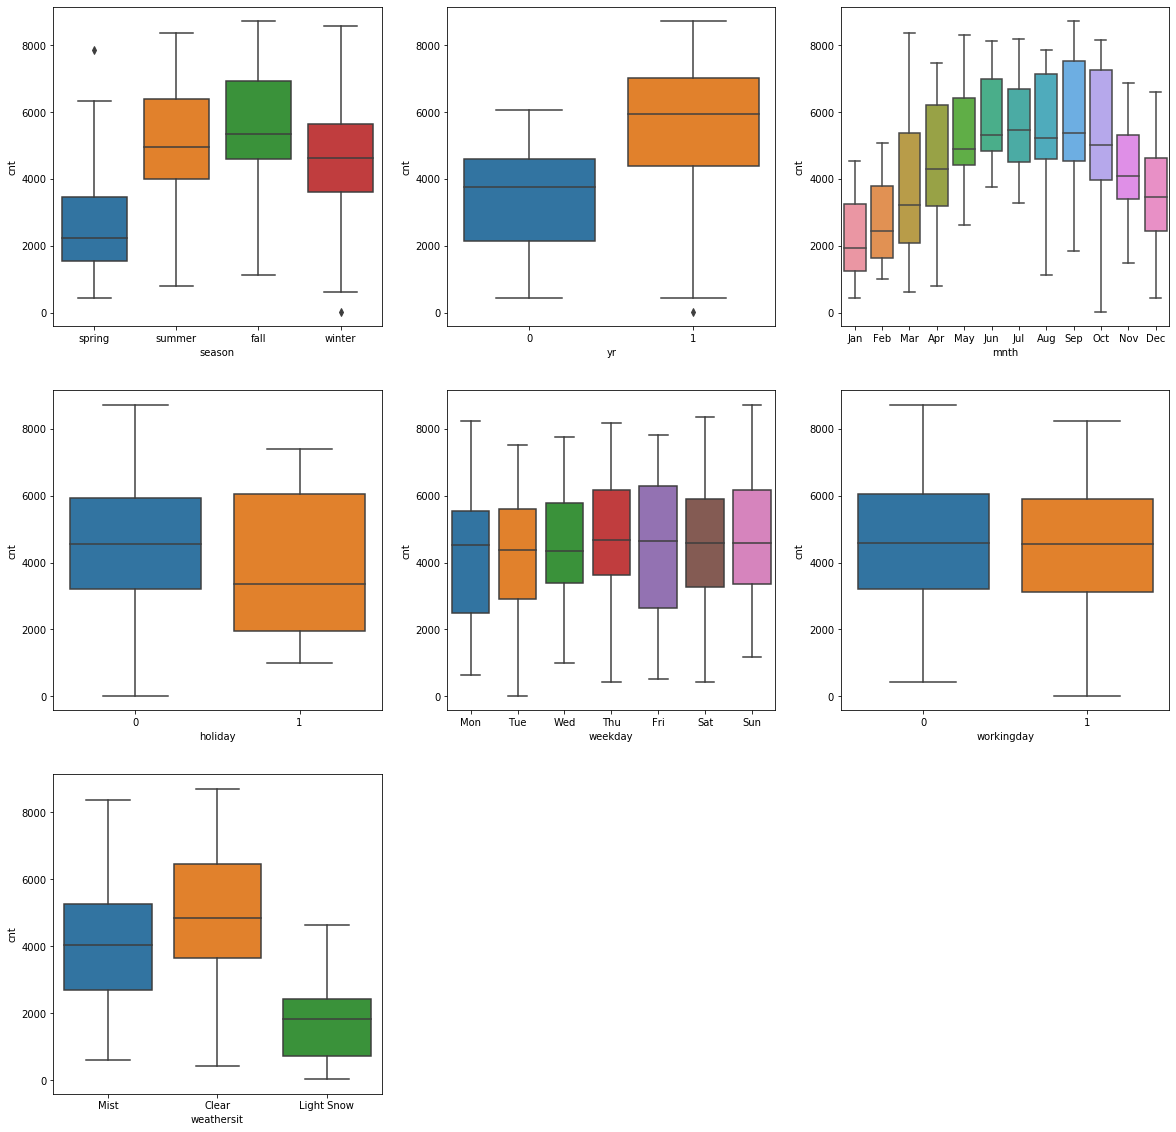

In [39]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt', data=boom)
plt.subplot(3,3,2)
sns.boxplot(x='yr', y='cnt', data=boom)
plt.subplot(3,3,3)
sns.boxplot(x='mnth', y='cnt', data=boom)
plt.subplot(3,3,4)
sns.boxplot(x='holiday', y='cnt', data=boom)
plt.subplot(335)
sns.boxplot(x='weekday', y='cnt', data=boom)
plt.subplot(336)
sns.boxplot(x='workingday', y='cnt', data=boom)
plt.subplot(3,3,7)
sns.boxplot(x='weathersit', y='cnt', data=boom)
plt.show();

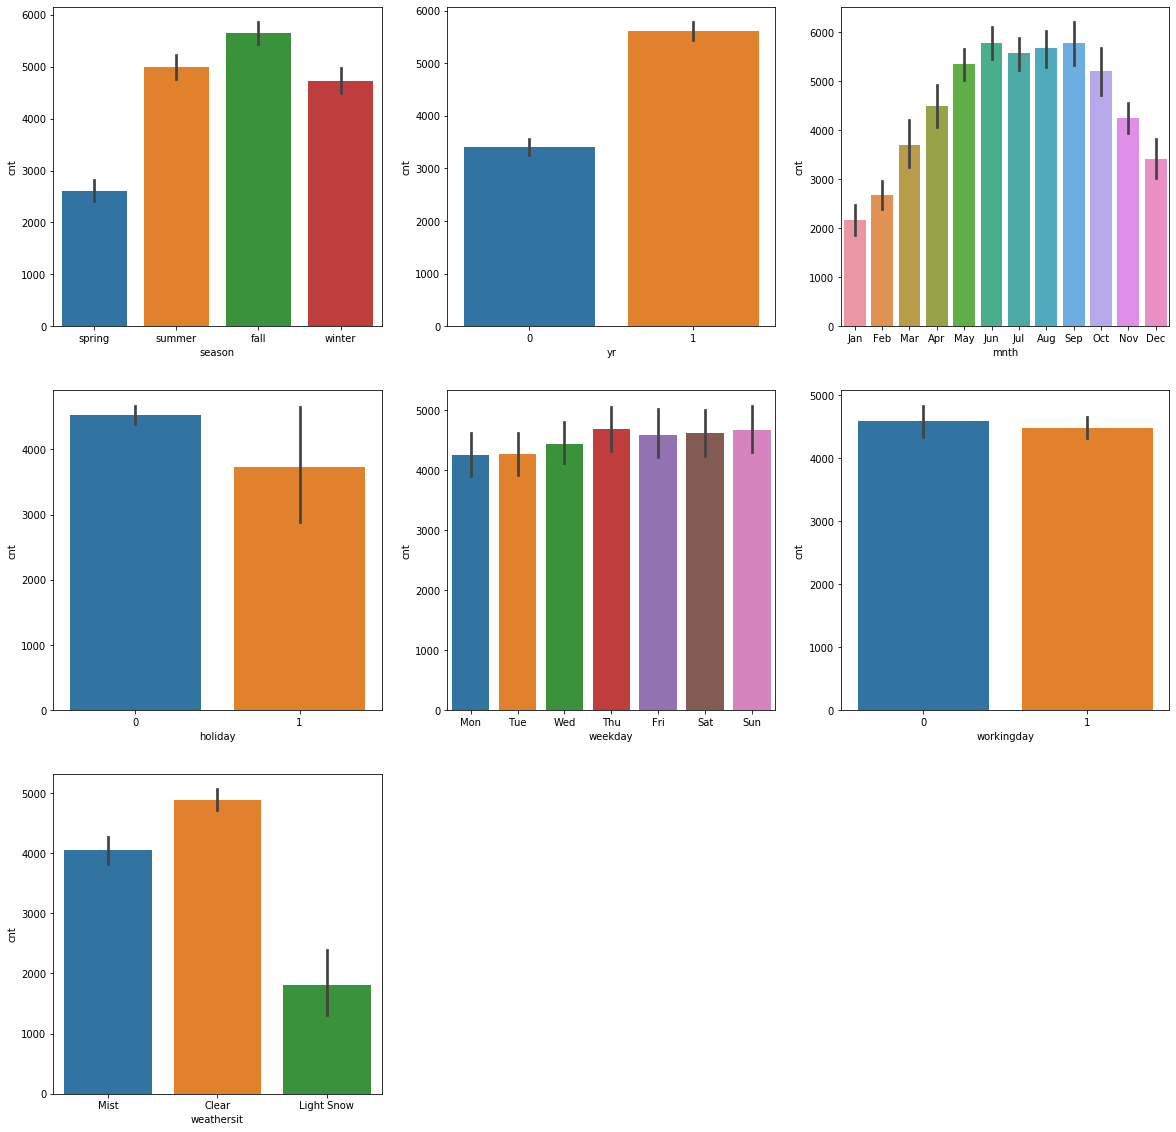

In [40]:
#Visualising by using bar plots

plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.barplot(x='season', y='cnt', data=boom)
plt.subplot(3,3,2)
sns.barplot(x='yr', y='cnt', data=boom)
plt.subplot(3,3,3)
sns.barplot(x='mnth', y='cnt', data=boom)
plt.subplot(3,3,4)
sns.barplot(x='holiday', y='cnt', data=boom)
plt.subplot(335)
sns.barplot(x='weekday', y='cnt', data=boom)
plt.subplot(336)
sns.barplot(x='workingday', y='cnt', data=boom)
plt.subplot(3,3,7)
sns.barplot(x='weathersit', y='cnt', data=boom)
plt.show();

## Visualising Numerical Variables

In [41]:
IntVariableList = ['casual','registered','cnt']

for var in IntVariableList:
    boom[var] = boom[var].astype('float')

In [42]:
boom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    object        
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    object        
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    object        
 7   weathersit  730 non-null    object        
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    float64       
 13  registered  730 non-null    float64       
 14  cnt         730 non-null    float64       
dtypes: datetime64[ns](1), float64(7), object(7)
memory usage: 85.7+ KB


In [43]:
boom_numeric = boom.select_dtypes(include=['float64'])

In [44]:
boom_numeric.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


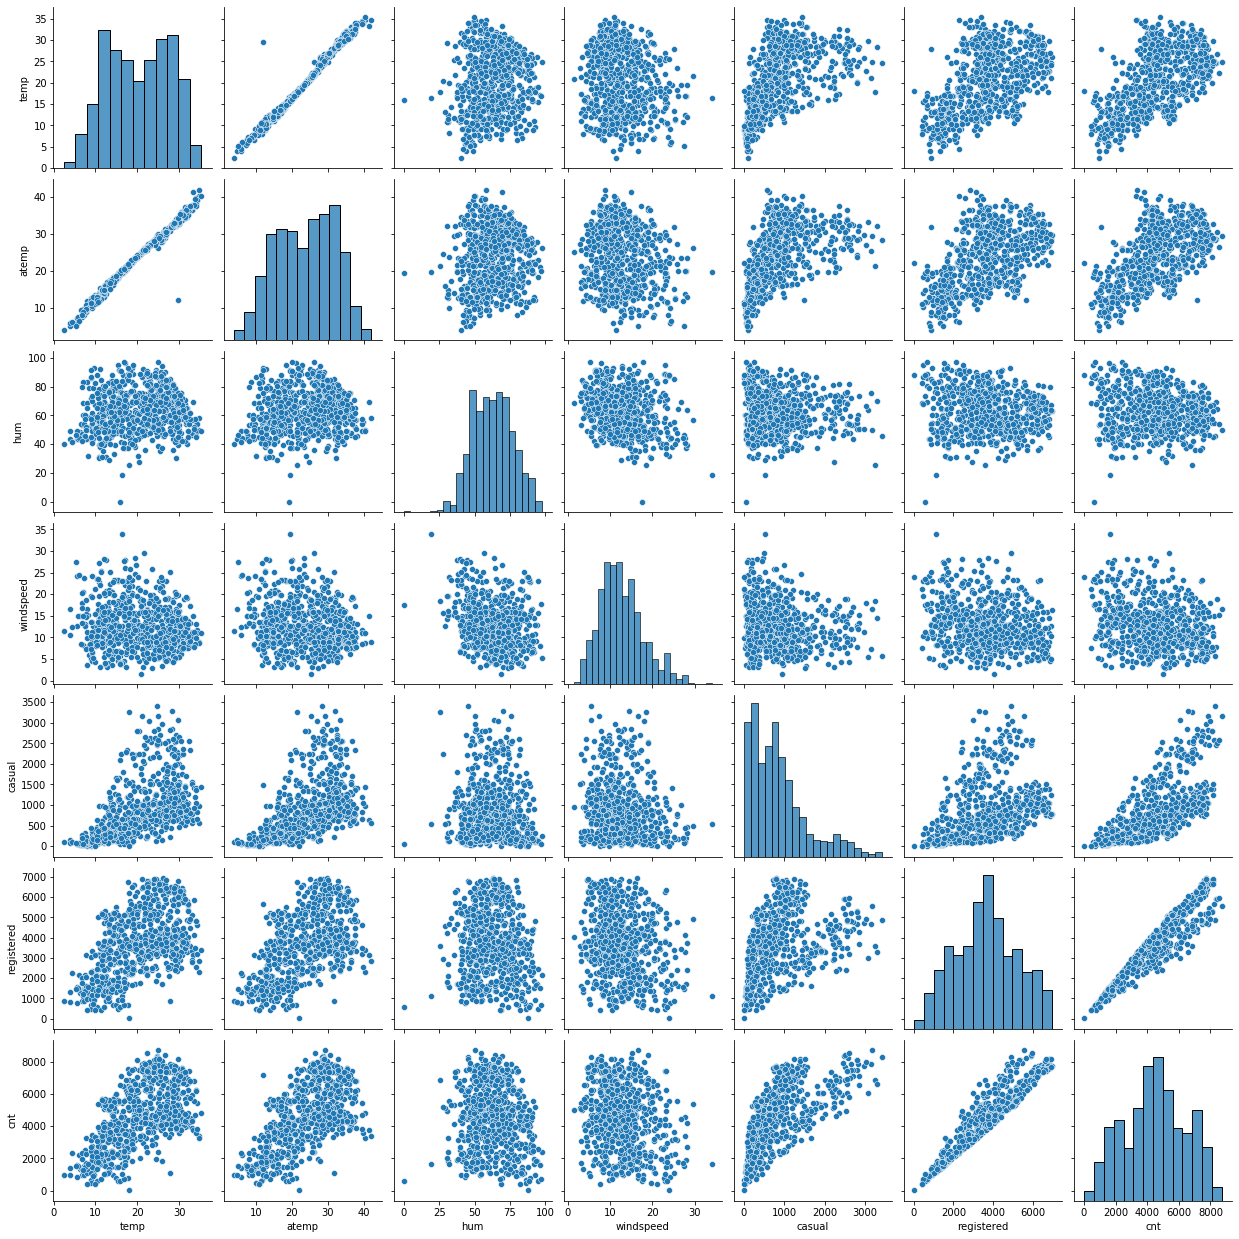

In [45]:
sns.pairplot(boom_numeric)
plt.show();

In [46]:
# Correlation Matrix

cor = boom_numeric.corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


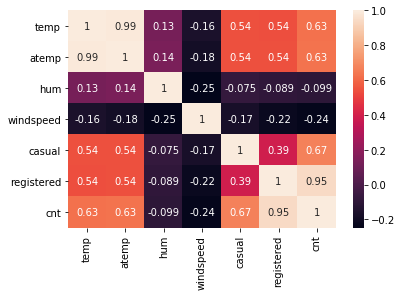

In [47]:
# heatmap

sns.heatmap(cor, annot=True);

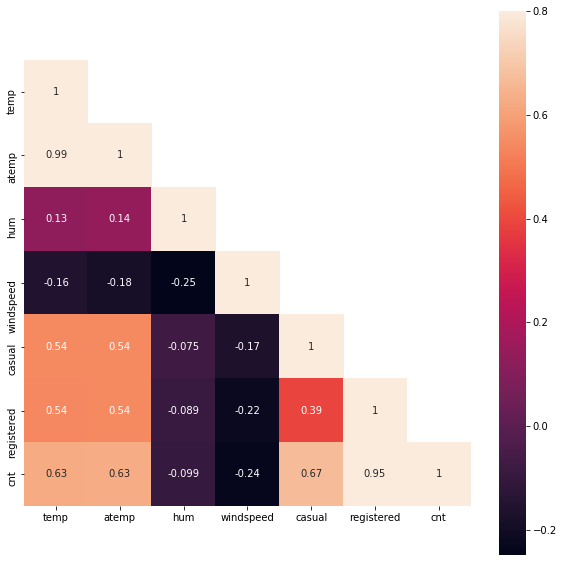

In [48]:
# heatmap

mask = np.array(cor)
mask[ np.tril_indices_from(mask) ] = False
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor, mask=mask, vmax=0.8, square=True, annot=True);

In [49]:
#atemp is showing multicolliearity so dropping these columns
boom.drop('atemp',axis=1,inplace=True)

In [50]:
boom.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'casual', 'registered',
       'cnt'],
      dtype='object')

# Data Preparation

In [51]:
boom_categorical.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit
0,spring,0,Jan,0,Mon,1,Mist
1,spring,0,Jan,0,Tue,1,Mist
2,spring,0,Jan,0,Wed,1,Clear
3,spring,0,Jan,0,Thu,1,Clear
4,spring,0,Jan,0,Fri,1,Clear


In [52]:
boom.drop('dteday',axis=1,inplace=True)

In [53]:
boom_dummy=['weekday','season','weathersit','mnth']

In [75]:
boom_d=pd.get_dummies(boom_dummy, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=True, dtype=None)

In [76]:
boom_d

,season,weathersit,weekday
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,0


In [78]:
boom = boom.drop(list(boom_categorical.columns), axis=1)

KeyError: "['yr' 'holiday' 'workingday'] not found in axis"

In [57]:
boom = pd.concat([boom, boom_d], axis=1)

In [77]:
boom.head()

,temp,hum,windspeed,cnt,mnth,season,weathersit,weekday
0,14.110847,80.5833,10.749882,985.0,0.0,0.0,0.0,1.0
1,14.902598,69.6087,16.652113,801.0,0.0,1.0,0.0,0.0
2,8.050924,43.7273,16.636703,1349.0,0.0,0.0,1.0,0.0
3,8.200000,59.0435,10.739832,1562.0,1.0,0.0,0.0,0.0
4,9.305237,43.6957,12.522300,1600.0,NaN,NaN,NaN,NaN


In [59]:
boom = boom.drop(['casual'], axis=1)

In [60]:
boom = boom.drop(['registered'], axis=1)

In [61]:
boom.head()

,temp,hum,windspeed,cnt,mnth,season,weathersit,weekday
0,14.110847,80.5833,10.749882,985.0,0.0,0.0,0.0,1.0
1,14.902598,69.6087,16.652113,801.0,0.0,1.0,0.0,0.0
2,8.050924,43.7273,16.636703,1349.0,0.0,0.0,1.0,0.0
3,8.200000,59.0435,10.739832,1562.0,1.0,0.0,0.0,0.0
4,9.305237,43.6957,12.522300,1600.0,NaN,NaN,NaN,NaN


# Model Building

In [62]:
X = boom.drop('cnt', axis=1)
y = boom.cnt

In [63]:
X.shape

(730, 7)

In [64]:
y.shape

(730,)

In [65]:
# train-test-split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [66]:
X_train.shape

(584, 7)

In [67]:
y_train.shape

(584,)

In [68]:
X_test.shape

(146, 7)

In [69]:
y_test.shape

(146,)

In [70]:
# Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [71]:
set(boom.describe().columns)

{'cnt', 'hum', 'mnth', 'season', 'temp', 'weathersit', 'weekday', 'windspeed'}

In [72]:
#hum, windspeed,temp
var = ['hum','windspeed','temp']
X_train[var] = scaler.fit_transform(X_train[var])
X_test[var] = scaler.transform(X_test[var])

In [73]:
X_train.head()

,temp,hum,windspeed,mnth,season,weathersit,weekday
239,1.169798,-0.460004,1.494191,NaN,NaN,NaN,NaN
97,-0.849259,1.498668,0.480773,NaN,NaN,NaN,NaN
503,0.587516,-1.212939,-1.385350,NaN,NaN,NaN,NaN
642,0.669099,0.009068,-1.093395,NaN,NaN,NaN,NaN
498,0.442477,1.165661,0.294182,NaN,NaN,NaN,NaN


In [74]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

In [ ]:
print(regressor.intercept_)

In [ ]:
# Predictions

y_pred = regressor.predict(X_test)

In [ ]:
boom1 = pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_pred
})

In [ ]:
boom1

In [ ]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
yhat = regressor.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

In [ ]:
yhat = regressor.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

# RFE

In [ ]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)

In [ ]:
X_train.shape

In [ ]:
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

In [ ]:
(rfe.support_==True).sum()

In [ ]:
(rfe.support_==False).sum()

In [ ]:
rfe.ranking_

In [ ]:
X_train.columns[rfe.support_]

In [ ]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]

In [ ]:
X_train_rfe.head()

In [ ]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [ ]:
X_train_new = build_model(X_train_rfe, y_train)


# Check for VIF

In [ ]:
checkVIF(X_train_new)

# Residual Analysis of the model

In [ ]:
lm = sm.OLS(y_train, X_train_new).fit()

In [ ]:
y_train_price = lm.predict(X_train_new)

In [ ]:
# Plot the hist of error term --> TRAIN

fig = plt.figure()
sns.distplot((y_train - y_train_price), bins=20)
plt.title("Error Terms", fontsize=14)
plt.xlabel("Errors", fontsize=10);